# 代码来自Groundbreaker 
# 想联系我的话花点心思不难找到我的联系方式
# 如果今年题目变了代码用不了了，可以在Github上找到我，我会尽快更新代码

### 课后练习
1.获取美国内地区疫情统计数据。

2.使用 matplotlib 绘制柱状图展示疫情确诊人数排名 top15 情况。

In [1]:
import requests

url = "https://www.bitpush.news/covid19/"
headers = {
    "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/95.0.4638.69 Safari/537.36"
}

response = requests.get(url, headers=headers)
html = response.text
html

'<!DOCTYPE html>\n<html class="js">\n<head>\n<meta http-equiv="Content-Type" content="text/html; charset=UTF-8">\n  <title>全球新冠疫情数据实时汇总</title>  \n  <meta property="og:title" content="Coronavirus,全球新冠疫情数据实时汇总">\n  <meta property="og:description" content="全球新冠疫情数据实时汇总">\n  <meta itemprop="name" content="Coronavirus,全球新冠疫情数据实时汇总">\n  <meta itemprop="description" content="新冠病毒感染汇总,比推,bitpush.news,新冠疫情,全球感染,美国感染,实时疫情,疫情播报,美国州感染,covid-19,感染名人,名人感染数据,美国新冠疫情,日本疫情,英国疫情,西班牙疫情,德国疫情,伊朗疫情,法国疫情,葡萄牙疫情,名人感染新冠,疫情汇总,纽约疫情,新泽西疫情,确诊人数,政商界确诊,文体界确诊,名人确诊">\n  <meta name="keywords" content="新冠病毒感染汇总,比推,bitpush.news,新冠疫情,全球感染,美国感染,实时疫情,疫情播报,美国州感染,covid-19,感染名人,名人感染数据,美国新冠疫情,日本疫情,英国疫情,西班牙疫情,德国疫情,伊朗疫情,法国疫情,葡萄牙疫情,名人感染新冠,疫情汇总,纽约疫情,新泽西疫情,确诊人数,政商界确诊,文体界确诊,名人确诊">\n  <meta name="description" content="新冠病毒感染汇总,比推,bitpush.news,新冠疫情,全球感染,美国感染,实时疫情,疫情播报,美国州感染,covid-19,感染名人,名人感染数据,美国新冠疫情,日本疫情,英国疫情,西班牙疫情,德国疫情,伊朗疫情,法国疫情,葡萄牙疫情,名人感染新冠,疫情汇总,纽约疫情,新泽西疫情,确诊人数,政商界确诊,文体界确诊,名人确诊">\n\n  <meta content="initial-scale=1, minimum-scale=1,

In [2]:
from lxml import etree
parse = etree.HTMLParser(encoding='utf-8') 
doc = etree.HTML(html)

In [3]:
state = []
person = []
death = []
for i in range(1, 59):
    xpath = f'//*[@id="main"]/div[2]/div/div/div/div/div[1]/table/tbody/tr[{i}]/td[1]/span/text()'
    state.append(doc.xpath(xpath)[0])

    xpath = f'//*[@id="main"]/div[2]/div/div/div/div/div[1]/table/tbody/tr[{i}]/td[2]/text()'
    person.append(int(doc.xpath(xpath)[0].replace(',', '')))

    xpath = f'//*[@id="main"]/div[2]/div/div/div/div/div[1]/table/tbody/tr[{i}]/td[3]/text()'
    death.append(int(doc.xpath(xpath)[0].replace(',', '')))

messages = list(zip(state, person, death))
messages

[('加州', 5959487, 76983),
 ('德克萨斯', 4946880, 76364),
 ('佛罗里达', 4486276, 62622),
 ('纽约', 3929750, 60276),
 ('伊利诺伊', 2382423, 30794),
 ('宾夕法尼亚', 2206899, 37522),
 ('俄亥俄', 2151829, 30072),
 ('乔治亚', 1928942, 31521),
 ('密西根', 1855658, 29955),
 ('北卡', 1816380, 19619),
 ('新泽西', 1782463, 29374),
 ('田纳西', 1462996, 20941),
 ('亚利桑那', 1430241, 24586),
 ('印第安纳', 1314688, 19448),
 ('马萨诸塞', 1250765, 20510),
 ('弗吉尼亚', 1220869, 15651),
 ('威斯康星', 1186066, 11402),
 ('密苏里', 1075994, 16476),
 ('明尼苏达', 1064065, 10906),
 ('南卡', 1048252, 14746),
 ('科罗拉多', 979437, 10402),
 ('阿拉巴马', 957848, 16585),
 ('华盛顿州', 913980, 9974),
 ('路易斯安那', 908428, 15054),
 ('肯塔基', 904916, 12319),
 ('马里兰', 800743, 12107),
 ('俄克拉荷马', 737593, 12592),
 ('犹他', 682036, 3887),
 ('阿肯色', 604843, 9298),
 ('爱荷华', 596296, 8019),
 ('密西西比', 586547, 10527),
 ('堪萨斯', 565288, 7101),
 ('康涅狄格', 563635, 9281),
 ('内华达', 509472, 8509),
 ('俄勒冈', 449267, 5728),
 ('新墨西哥', 364861, 5969),
 ('内布拉斯加', 355928, 3416),
 ('西弗吉尼亚', 351688, 5421),
 ('波多黎各', 340152, 335

In [7]:
with open('data.csv', 'w') as f:
    f.write('state,person,death\n')
    for message in messages:
        f.write(','.join(map(str, message)) + '\n')

In [6]:
dct = {message[0]: message[1] for message in messages[:16]}
dct

{'加州': 5959487,
 '德克萨斯': 4946880,
 '佛罗里达': 4486276,
 '纽约': 3929750,
 '伊利诺伊': 2382423,
 '宾夕法尼亚': 2206899,
 '俄亥俄': 2151829,
 '乔治亚': 1928942,
 '密西根': 1855658,
 '北卡': 1816380,
 '新泽西': 1782463,
 '田纳西': 1462996,
 '亚利桑那': 1430241,
 '印第安纳': 1314688,
 '马萨诸塞': 1250765,
 '弗吉尼亚': 1220869}

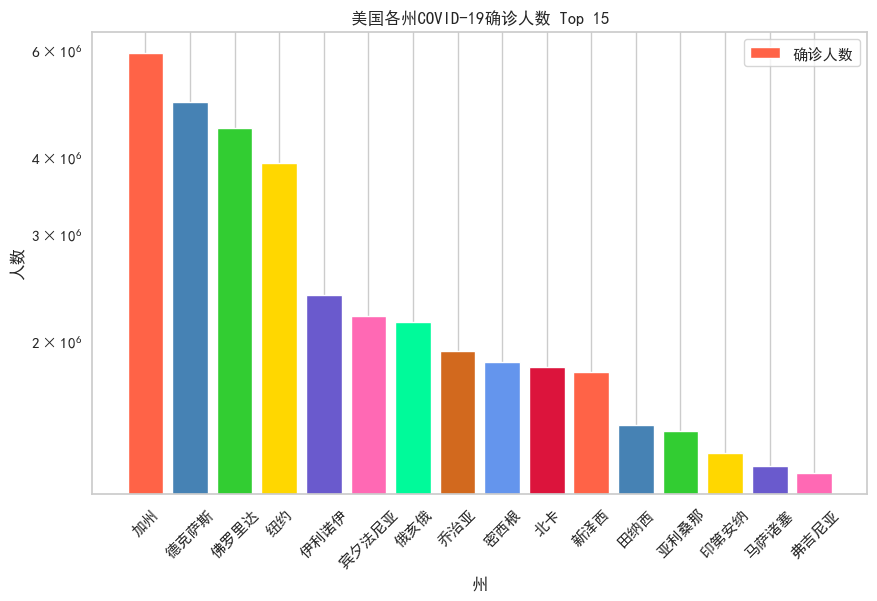

In [20]:
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']  
plt.figure(figsize=(10, 6))

colors = ['#FF6347', '#4682B4', '#32CD32', '#FFD700', '#6A5ACD', '#FF69B4', '#00FA9A', '#D2691E', '#6495ED', '#DC143C']

plt.bar(dct.keys(), dct.values(), color=colors[:len(dct)])
plt.xticks(rotation=45)
plt.yscale('log')
plt.title('美国各州COVID-19确诊人数 Top 15')
plt.ylabel('人数')
plt.xlabel('州')
plt.show()